# Barotopic Streamfunction (BSF)

# LENS2 Product
Get an overview of the structure of the BSF
- Inspect data
- Plot global BSF at time = 0
- Apply mask and plot BSF at time = 0 in region
- Plot miminimum of annualy averaged BSF in selected region

# Computation from meridional velocity
Compute stream function manually

# Initialisation

In [1]:
import xarray as xr
import pop_tools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy

# LENS 2 BSF product

In [2]:
filename = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/bsf/bsf_1001.001.nc'

### Inspect data

In [3]:
ds_bsf = xr.open_dataset(filename)
ds_bsf

<xarray.Dataset>
Dimensions:                 (moc_comp: 3, transport_comp: 5, transport_reg: 2,
                             z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                             z_w_bot: 60, lat_aux_grid: 395, moc_z: 61,
                             nlat: 384, nlon: 320, time: 3012, d2: 2)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 ...
    ULAT                    (nlat, nlon) float64 ...
    TLONG                   (nlat, nlon) float64 ...
    TLAT                    (nlat, nlon) float64 ...
  * time                    (time) object 1850-02-01 00:00:00 ... 2101-01-01 ...
Dimensions without coordinates: moc_comp, transport_comp, transport_reg, nlat,
                                nlon, d2
Data variables: (12/55)
    moc_components          (moc_comp) |S384 ...
    transport_components    (transport_comp) |S384 ...
    transport_regions       (transport_reg) |S384 ...
    dz                      (z_t) float32 ...
    dzw                     (z_w) float32 ...
    KMT                     (nlat, nlon) float64 ...
    ...                      ...
    salinity_factor         float64 ...
    sflux_factor            float64 ...
    nsurface_t              float64 ...
    nsurface_u              float64 ...
    time_bound              (time, d2) object ...
    BSF                     (time, nlat, nlon) float32 ...
Attributes: (12/13)
    title:                     b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    history:                   Mon Dec 26 20:26:02 2022: ncrcat --no_tmp_fl /...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    time_period_freq:          month_1
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    contents:                  Diagnostic and Prognostic Variables
    ...                        ...
    revision:                  $Id$
    calendar:                  All years have exactly  365 days.
    start_time:                This dataset was created on 2020-01-31 at 16:3...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

### Plot global BSF at time = 0

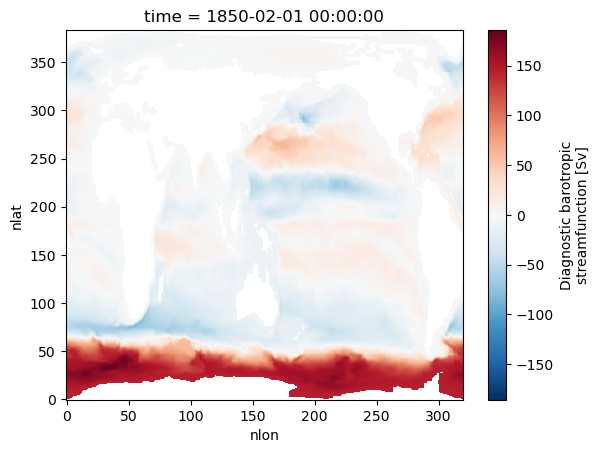

In [4]:
ds_bsf.BSF.isel(time=0).plot()

### Apply mask and plot BSF in region

In [5]:
# setting up of regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [15.0, 66.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}        
    ]}
mask3d = pop_tools.region_mask_3d(grid_name, 
                                  region_defs=region_defs, 
                                  mask_name='Subpolar Gyre')
mask3d = mask3d.sum('region')  
ds = ds_bsf.where(mask3d == 1)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


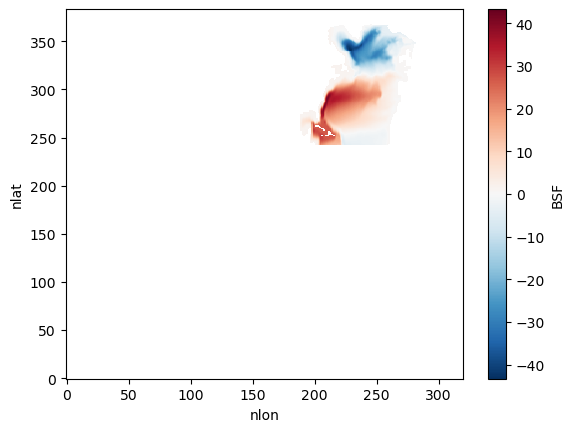

In [6]:
# to center plot roll by 80° longitude
ds.BSF.isel(time=slice(0,30)).mean('time').roll(nlon=-80).plot()

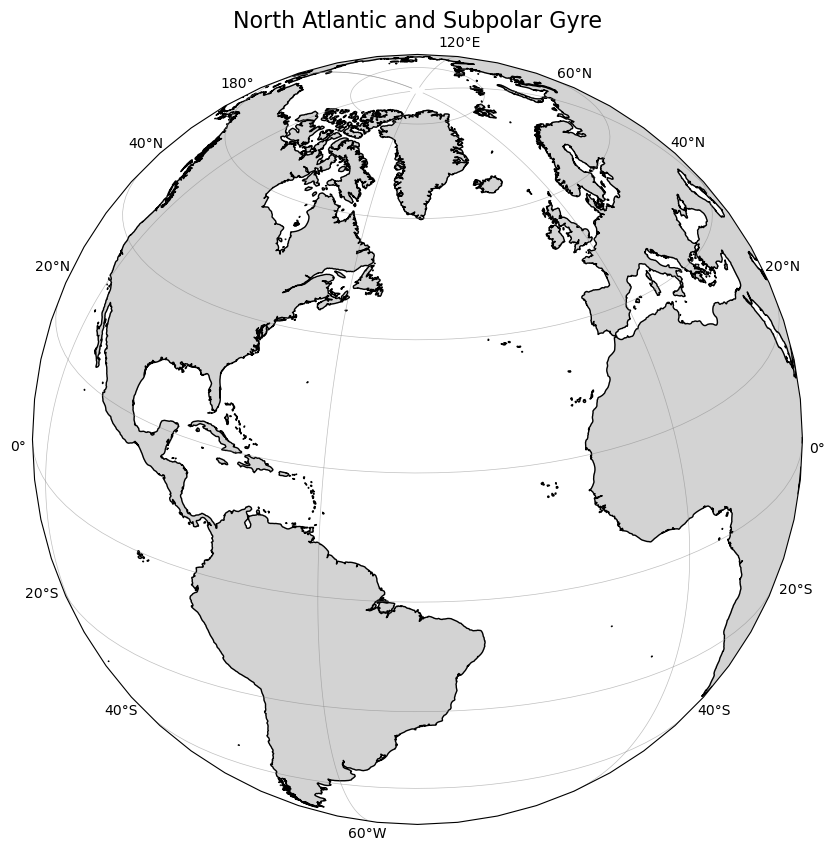

In [23]:
ccrs = cartopy.crs

# Set up the figure and axis with Orthographic projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(central_longitude=-45, central_latitude=25)}, figsize=(10, 10))

# Add land features
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgray'))

# Add coastlines
ax.coastlines(resolution='50m', linewidth=1)

# Add gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='-')

# Add title
ax.set_title('North Atlantic and Subpolar Gyre', fontsize=16)

# Add markers for North Atlantic and Subpolar Gyre
#na_marker = ax.plot(-60, 60, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree(), label='North Atlantic')
#spg_marker = ax.plot(-30, 65, marker='o', color='blue', markersize=8, transform=ccrs.PlateCarree(), label='Subpolar Gyre')

# Add legend
#ax.legend(loc='upper right')

plt.show()

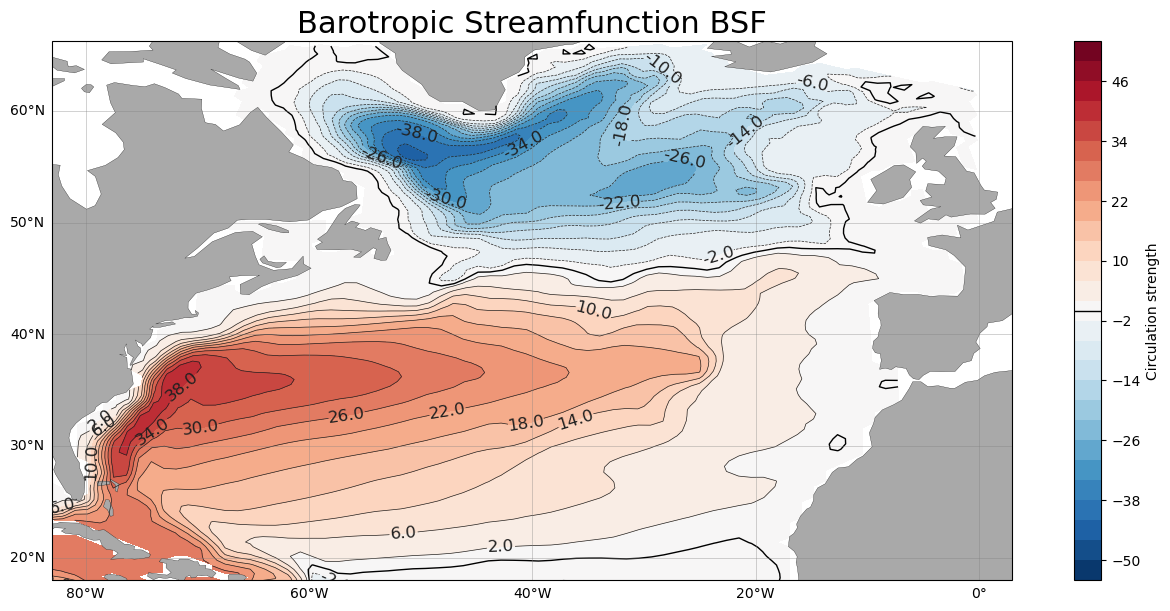

In [27]:
# Set kwargs
crs = cartopy.crs.PlateCarree()
vmin, vmax = -54, 54
levels = np.linspace(vmin, vmax, 28)
cmap = 'RdBu_r'
extent = [-83, 3, 18, 59]
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
title = 'Barotropic Streamfunction BSF'
path = '/home/innag3580/phase1_CONDA/results/'
save_name = 'NA_BSF.png'

# Create the figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(16, 7), subplot_kw={'projection': cartopy.crs.PlateCarree()})

# Add land features
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', linewidth=0.2, edgecolor='black', facecolor='darkgray'))

# Adjust gridlines
ax.gridlines(crs=crs, linewidth=0.5, color='gray', alpha=0.5, linestyle='-', draw_labels={'bottom': True, 'left': True, 'right': False, 'top': False, 'fontsize': 22})

# Set extent and title
ax.set_extent(extent)
ax.set_title(title, fontsize=22)

# Plot map and contours
cf = ax.contourf(ds.TLONG.roll(nlon=-80), ds.TLAT.roll(nlon=-80),
                 ds.BSF.isel(time=slice(0, 30)).mean('time').roll(nlon=-80), levels=levels, cmap=cmap, norm=norm)
cf2 = ax.contour(ds.TLONG.roll(nlon=-80), ds.TLAT.roll(nlon=-80),
                 ds.BSF.isel(time=slice(0, 30)).mean('time').roll(nlon=-80), levels=levels, colors=['#202020', ],
                 linewidths=0.5)

# Add labels to existing contour lines
ax.clabel(cf2, inline=True, fontsize=12, fmt='%1.1f')

# Contour line for 0 contour in black
cf_zero_contour = ax.contour(ds.TLONG.roll(nlon=-80), ds.TLAT.roll(nlon=-80),
                             ds.BSF.isel(time=slice(0, 30)).mean('time').roll(nlon=-80), levels=[0], colors=['black'],
                             linewidths=1, linestyles='solid')

# Plot colorbar
cbar = fig.colorbar(cf, ax=ax, label='Circulation strength')

# Combine the existing and new contour lines in the colorbar
cbar.add_lines(cf2)
cbar.add_lines(cf_zero_contour)

# Save the figure
plt.savefig(f'{path}{save_name}', bbox_inches='tight')
plt.show()

### Plot miminimum of annualy averaged BSF in selected region

In [7]:
# annualy average BSF
ds_annual = ds.groupby('time.year').mean('time')
# find minimum of BSF in region per time step
ds_min = ds_annual.BSF.min(('nlon','nlat'))
# extract numpy array 
min_timeseries = ds_min.values
# compute relating time series
time = np.arange(1850,1850+(len(min_timeseries)))

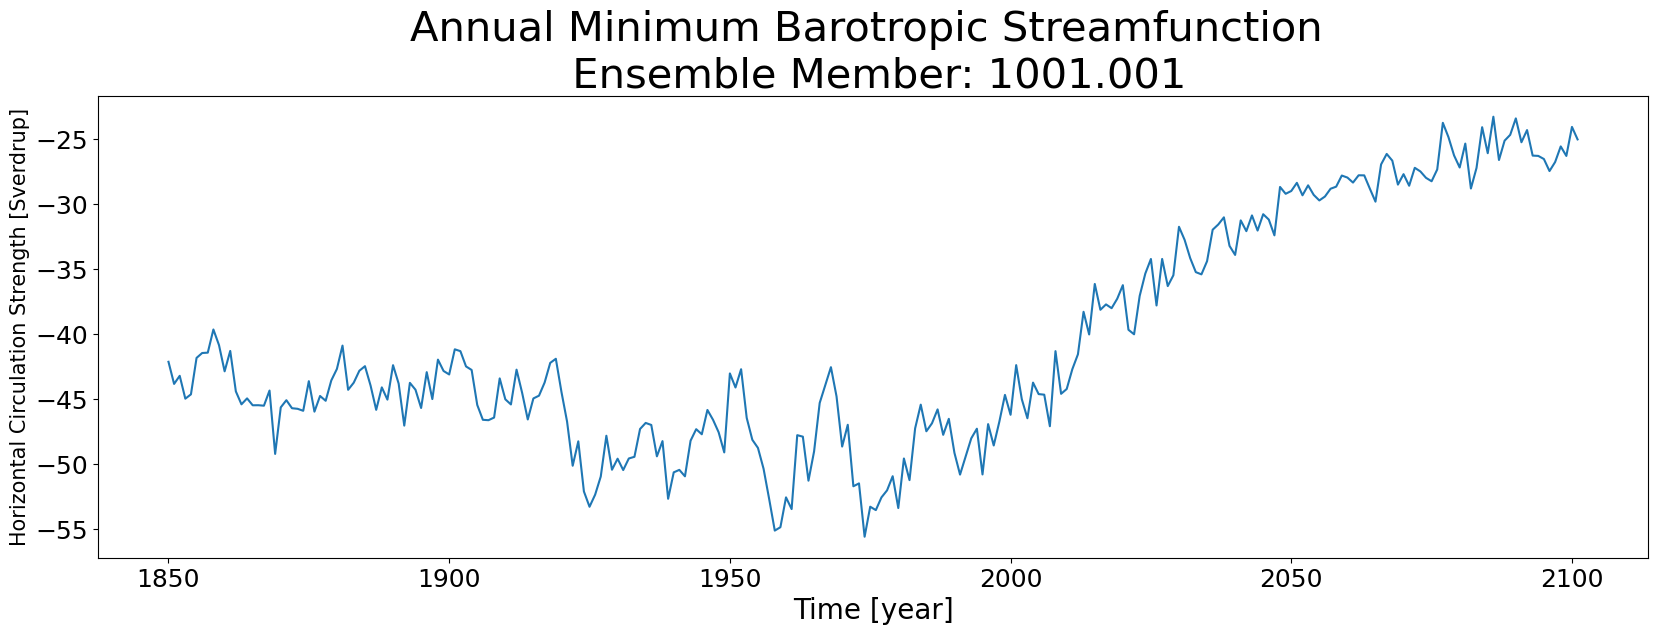

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(time, min_timeseries)
plt.title('Annual Minimum Barotropic Streamfunction \n Ensemble Member: 1001.001', fontsize=30)
plt.xlabel('Time [year]', fontsize=20)
plt.ylabel('Horizontal Circulation Strength [Sverdrup]', fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Computation from meridional velocity

In [23]:
# file name meridional velocity
vvel_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/vvel/vvel_1001.001.nc'
# load data set
ds_vvel = xr.open_dataset(vvel_file)
# apply mask for time = 0
ds_na = ds_vvel.isel(time=0).where(mask3d, 0)

In [27]:
# rotate grrid by -80 degree longitude
ds_nao = ds_na.roll(nlon=-80)

lon_nao = ds_vvel['ULONG'].roll(nlon=-80).data
lat_nao = ds_vvel['ULAT'].roll(nlon=-80).data

lon_nao = np.nan_to_num(lon_nao)
lat_nao = np.nan_to_num(lat_nao)

In [28]:
VVEL_mps = ds_nao.VVEL *1e-2  # Convert cm/s to m/s
dz_m = ds_nao.dz *1e-2  # Convert cm to m
dx_m = ds_nao.DXU *1e-2  # Convert cm to m
V_bt_nao = (VVEL_mps * dz_m * dx_m).sum('z_t')
psi_nao = V_bt_nao.cumsum('nlon') * 1e-6  # Convert m^3/s to Sv

psi_nao_masked = psi_nao.where(mask3d.roll(nlon=-80), 0)

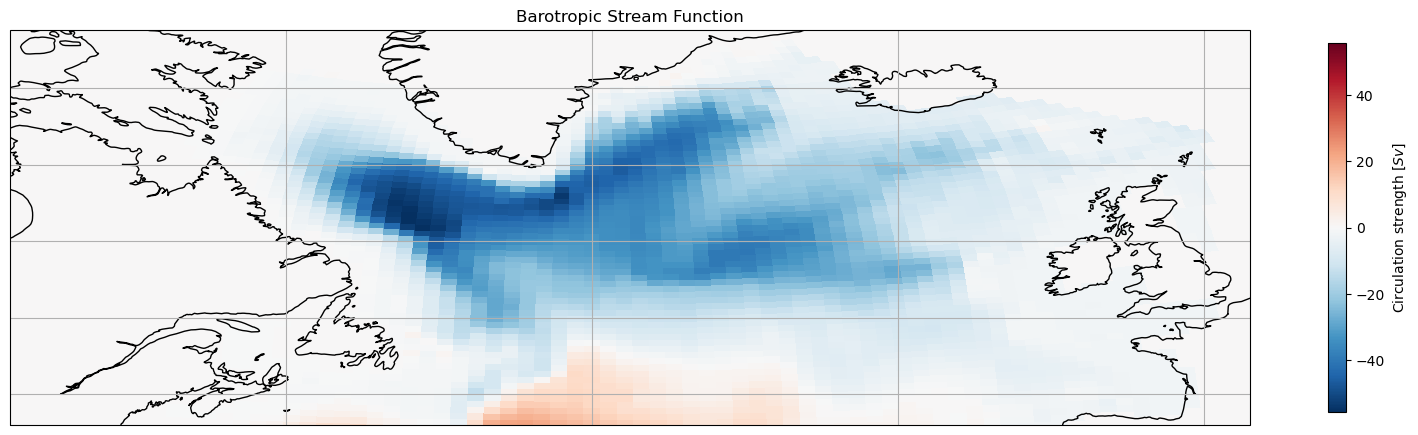

In [30]:
extent = [-78, 3, 43, 63]
vmin = -np.max(np.abs(psi_nao.data))  # Set vmin to the negative maximum value
vmax = np.max(np.abs(psi_nao.data))   # Set vmax to the positive maximum value

fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={'projection': cartopy.crs.PlateCarree()})

ax.set_extent(extent)

pcm = ax.pcolormesh(lon_nao, lat_nao, psi_nao_masked, cmap='RdBu_r', vmin=vmin, vmax=vmax, transform=cartopy.crs.PlateCarree())

ax.coastlines()
ax.gridlines()
cbar = plt.colorbar(pcm, ax=ax, shrink=0.6, label = 'Circulation strength $[Sv]$')  # Colorbar for pcolormesh
plt.title('Barotropic Stream Function', )
plt.show()
#plt.savefig('results/correct_bsf.png', bbox_inches='tight')